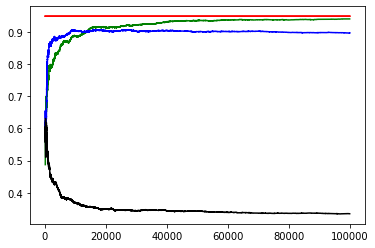

In [1]:
'This code is only the test version for three method. We roughly code these three methodolgy to compare their results'
'This code is only for student to play around, not the completed version' 
'The basic code is from the website CSDN'
import numpy as np
import matplotlib.pyplot as plt

class E_greedy:
    def __init__(self,arm_num=10,epsilon=0.5):
        self.arm_num = arm_num
        self.epsilon = epsilon
        self.arms = np.random.uniform(0, 1, self.arm_num)
        self.Q = np.zeros(arm_num)
        self.NA = np.zeros(arm_num)
        self.T = 100000
        self.R = 0
        self.R_list = []
        self.HAP = np.zeros(arm_num)
        self.HA = np.zeros(arm_num)
        self.R_ = np.zeros(arm_num)

    def reset(self):
        self.Q = np.zeros(self.arm_num)
        self.NA = np.zeros(self.arm_num)
        self.R_list = []
        self.R = 0

    def get_reward(self,arm_index):
        return self.arms[arm_index] + np.random.normal(0, 1)

    def update_Q_NA(self,arm_index,reward):
        self.NA[arm_index] += 1
        self.Q[arm_index] += 1/self.NA[arm_index]*(reward-self.Q[arm_index])

    def update_NA(self,arm_index):
        self.NA[arm_index] += 1

    def e_greedy(self,epsilon=None):
        if epsilon:
            self.epsilon = epsilon
        for iter in range(1,self.T+1):
            if np.random.random() > self.epsilon:
                if iter == 1:
                    arm_index = np.random.randint(0,self.arm_num)
                else:
                    arm_index = np.argmax(self.Q)
            else:
                arm_index = np.random.randint(0, self.arm_num)
            reward = self.get_reward(arm_index)
            self.R += 1/iter*(reward-self.R)
            self.R_list.append((iter,self.R))
            self.update_Q_NA(arm_index,reward)

    def ucb(self,c):
        for iter in range(1,self.T+1):
            A_list = self.Q + c*(np.sqrt(np.log(iter)/(self.NA+1e-8)))
            arm_index = np.argmax(A_list)
            reward = self.get_reward(arm_index)
            self.R += 1/iter*(reward-self.R)
            self.R_list.append((iter,self.R))
            self.update_Q_NA(arm_index,reward)

    def get_HA(self):
        hae = np.array([np.e**x for x in self.HA])
        sum = np.sum(hae)
        self.HAP = hae/sum

    def gradient(self,a):
        for iter in range(1,self.T+1):
            self.get_HA()
            arm_index = np.random.choice(list(range(self.arm_num)),p=self.HAP)
            reward = self.get_reward(arm_index)
            self.update_NA(arm_index)
            self.R_[arm_index] += 1/self.NA[arm_index] * (reward - self.R_[arm_index])
            self.R += 1/iter*(reward-self.R)
            self.R_list.append((iter,self.R))
            ha_temp = self.HA[arm_index] + a*(reward-self.R_[arm_index])*(1-self.HAP[arm_index])
            self.HA -= a * (reward - self.R_[arm_index]) * self.HAP
            self.HA[arm_index] = ha_temp

    def plot_R(self,c):
        plt.plot([k[0] for k in self.R_list[100:]], [k[1] for k in self.R_list[100:]], c=c)
        plt.plot([k[0] for k in self.R_list[100:]], [np.max(self.arms) for k in self.R_list[100:]],c='r')

def main():
    e = E_greedy()
    e.ucb(2)
    e.plot_R(c='g')
    e.reset()
    e.e_greedy(0.1)
    e.plot_R(c='b')
    e.reset()
    e.gradient(0.25)
    e.plot_R(c='k')
    plt.show()

if __name__ == '__main__':
    main()

